# INTRODUCTION

22 November 2015, WD

The purpose of this notebook is:
- show how the ctw.csv file can be used in Python
- experiment with the Python pandas module

This notebook uses pandas to:
- read data from a df.read_csv() file
- transform the data
- make a pivot table
- group records using df.groupby()
- makes results table using df.aggregate()
- merge to tables on their index
- make a histogram and bar graphs

# 0 - prepare

In [1]:
from pandas import *
from matplotlib.pyplot import *
from numpy import *
%matplotlib inline

# 1 - read data

In [2]:
dat0 = read_csv('ctw.csv') # NOTE ctw.csv has to be UTF-8 encoded (not ANSI)
dat0.shape


(152, 35)

In [3]:
dat0.columns  # for an explanation of the column names see ctw_code_book.rtf

Index(['code', 'country', 'region', 'pop', 'PPP', 'GDP', 'PPPpc', 'GDPpc',
       'HDI', 'KOFec', 'KOFsoc', 'KOFpol', 'trade', 'FDIins', 'FDIouts',
       'FDIinf', 'FDIoutf', 'trust', 'tYear', 'tSource', 'ethFrac',
       'langFractE', 'langFracD', 'reliFrac', 'reli', 'gini', 'voice', 'demo',
       'stab', 'govEff', 'regQual', 'ROLwb', 'ROLwjp', 'CORwb', 'fragil'],
      dtype='object')

In [4]:
#set_option('display.width'      , 5000) # show whole table
set_option('display.max_columns', 60  ) # show whole table

dat0.head()

,code,country,region,pop,PPP,GDP,PPPpc,GDPpc,HDI,KOFec,KOFsoc,KOFpol,trade,FDIins,FDIouts,FDIinf,FDIoutf,trust,tYear,tSource,ethFrac,langFractE,langFracD,reliFrac,reli,gini,voice,demo,stab,govEff,regQual,ROLwb,ROLwjp,CORwb,fragil
0,AFG,Afghanistan,Southern Asia,30552,NaN,20496.8,NaN,NaN,0.374,NaN,17.4,48.1,32.0,1568.9,NaN,69.3,NaN,NaN,NaN,NaN,0.769,0.790,0.325,0.272,97,NaN,-1.32,2.48,-2.42,-1.40,-1.21,-1.72,0.34,-1.41,4.22
1,ALB,Albania,Southern Europe,3173,28211.4,12648.1,9962.6,4466.9,0.749,61.9,42.1,71.1,54.2,4885.4,206.1,1225.5,39.8,51.2,2002,World Values Survey Wave 1-4 (1981-2004),0.220,0.563,0.028,0.472,39,NaN,0.01,5.67,-0.16,-0.28,0.17,-0.57,0.49,-0.72,2.19
2,DZA,Algeria,Northern Africa,39208,474759.2,205788.8,13195.0,5518.0,0.713,39.7,34.9,83.7,58.7,23264.1,2133.2,1691.0,-268.0,38.6,2014,World Values Survey Wave 6 (2010-2014),0.339,0.354,0.046,0.009,95,NaN,-0.91,3.83,-1.34,-0.55,-1.29,-0.79,NaN,-0.54,2.61
3,AGO,Angola,Middle Africa,21472,142979.3,114147.0,7288.0,5311.3,0.508,62.1,21.7,48.5,85.0,1937.1,9877.0,-4284.8,2086.8,NaN,NaN,NaN,0.787,0.778,0.038,0.628,NaN,42.7,-1.08,3.35,-0.38,-1.02,-0.98,-1.28,NaN,-1.29,2.44
4,ARG,Argentina,South America,41446,NaN,475501.7,NaN,NaN,0.811,39.5,52.6,93.1,31.5,110704.3,32913.6,9082.0,1225.0,40.4,2010,World Values Survey Wave 6 (2010-2014),0.255,0.168,0.127,0.224,66,44.5,0.25,6.84,0.07,-0.25,-0.96,-0.71,0.50,-0.49,2.26


The table contains data of 152 counties.  
There are 35 variables describing each country.  
    
For more info see: ctw_code_book.rtf.

# 2 - transform data
First select only the colums that are needed.

In [5]:
needed_cols = [ 'region','country','HDI','trust','demo']
# HDI - - Human Development Index (HDI) value 2012
# trust - Trust index (0-150)
# demo- - Democracy Index 2012 (The Economist Intelligence Unit)
dat = dat0[needed_cols].copy()
dat.head()

,region,country,HDI,trust,demo
0,Southern Asia,Afghanistan,0.374,NaN,2.48
1,Southern Europe,Albania,0.749,51.2,5.67
2,Northern Africa,Algeria,0.713,38.6,3.83
3,Middle Africa,Angola,0.508,NaN,3.35
4,South America,Argentina,0.811,40.4,6.84


In [6]:
# check for NaN's
dat.isnull().sum()

region      0
country     0
HDI         6
trust      37
demo        4
dtype: int64

In [7]:
# remove rows containing NaN's
dat = dat.dropna()
dat.shape

(113, 5)

See Appendix 1 for a complete listing of the data

## process HDI
First lets have a look at the distribution of the 113 HDI values 

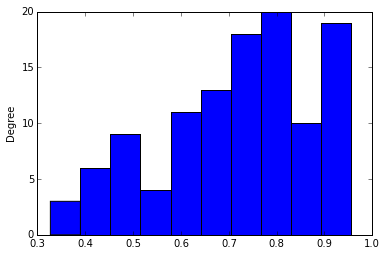

In [8]:
dat['HDI'].plot(kind='hist')

Now, lets say that HDI is:  
H (High) when HDI >= 0.8  
L (Low) when  HDI <= 0.67  
M (Medium) otherwise  

In [9]:
def make_HDI_cat(x): 
    if   x >= 0.8  : return 'H'
    elif x <= 0.67 : return 'L'
    else           : return 'M'

In [10]:
#  test the function
for tel in range(3):
    print(tel, make_HDI_cat(0.31*(1+tel)))

0 L
1 L
2 H


Add a column for the categorical HDI vaule (for HDI_cat).  
Add a column with only 1's (so we can use sum to count how many cases there are)  
- *NOTE try to find more elegant solution*

In [11]:
dat['HDI_cat'] = dat['HDI'].apply(make_HDI_cat)
dat['count'] = 1
dat.head(3)

,region,country,HDI,trust,demo,HDI_cat,count
1,Southern Europe,Albania,0.749,51.2,5.67,M,1
2,Northern Africa,Algeria,0.713,38.6,3.83,M,1
4,South America,Argentina,0.811,40.4,6.84,H,1


Lets have a look at the distribution of the new values

In [12]:
grouped = dat.groupby('HDI_cat')
#grouped.describe()
grouped['HDI_cat'].count()

HDI_cat
H    36
L    39
M    38
Name: HDI_cat, dtype: int64

All three HDI_cat groups are about the same size (say 37)

# 3 - Analyse relationship

Lets see if different regions have the same HDI_cat Distrubution.

In [13]:
#?pivot_table

In [14]:
ptab = pivot_table(dat,
    index=['region'],
    columns=['HDI_cat'],
    values='count',
    aggfunc=sum,
    margins=True)

ptab.fillna(0) # NOTE without fillna(0) all 0 will be displayed as NaN

HDI_cat,H,L,M,All
region,,,,
Caribbean,0,0,1,1
Central America,0,3,4,7
Central Asia,0,2,1,3
Eastern Africa,0,10,0,10
Eastern Asia,3,0,2,5
Eastern Europe,4,1,5,10
Northern Africa,0,2,3,5
Northern America,2,0,0,2
Northern Europe,8,0,0,8


In [15]:
#?ptab
##result: ptab is a dataframe object, so one can use it as such

In [16]:
ptab['L'].head(3)

region
Caribbean         NaN
Central America     3
Central Asia        2
Name: L, dtype: float64

In [17]:
# make NaN -> permanent
ptab = ptab.fillna(0)
ptab['L'].head(3)

region
Caribbean          0
Central America    3
Central Asia       2
Name: L, dtype: float64

In [18]:
ptab.columns

Index(['H', 'L', 'M', 'All'], dtype='object', name='HDI_cat')

In [19]:
# replace count by percentages
perctab = ptab.copy()
new_col_order = ['H','M','L','All']
perctab = perctab[new_col_order]
perctab['H'] = (100*ptab['H']/ptab['All']).round()
perctab['L'] = (100*ptab['L']/ptab['All']).round()
perctab['M'] = (100*ptab['M']/ptab['All']).round()
perctab.sort(['H','M'], ascending=False)

HDI_cat,H,M,L,All
region,,,,
Northern America,100,0,0,2
Northern Europe,100,0,0,8
Oceania,100,0,0,2
Western Europe,100,0,0,6
Eastern Asia,60,40,0,5
Southern Europe,60,40,0,10
Eastern Europe,40,50,10,10
All,32,34,35,113
South America,20,70,10,10


In [20]:
# make a version of dat where rows are regions 
# and value is average for that region
regdat = dat.groupby('region')
regdat = regdat.aggregate(mean)
# round the averages
regdat['HDI'  ] = regdat['HDI'  ].round(2)
regdat['trust'] = regdat['trust'].round(0)
regdat['demo' ] = regdat['demo' ].round(1)
# remove the count column
cols_to_keep = ['HDI','trust','demo']
regdat = regdat[cols_to_keep]
#show the result
regdat

,HDI,trust,demo
region,,,
Caribbean,0.70,75,6.5
Central America,0.69,46,6.5
Central Asia,0.68,61,3.1
Eastern Africa,0.44,36,4.7
Eastern Asia,0.82,72,6.4
Eastern Europe,0.79,46,6.2
Northern Africa,0.69,33,4.7
Northern America,0.92,78,8.6
Northern Europe,0.89,93,8.7


Now merge perctab and regdat on region

In [21]:
# NOTE the merge must be on the indici, these are normally not available
# to make the indices available add: left_index=True,right_index=True

regions = merge(perctab, regdat, left_index=True, right_index=True).copy()
regions


HDI_cat,H,M,L,All,HDI,trust,demo
region,,,,,,,
Caribbean,0,100,0,1,0.70,75,6.5
Central America,0,57,43,7,0.69,46,6.5
Central Asia,0,33,67,3,0.68,61,3.1
Eastern Africa,0,0,100,10,0.44,36,4.7
Eastern Asia,60,40,0,5,0.82,72,6.4
Eastern Europe,40,50,10,10,0.79,46,6.2
Northern Africa,0,60,40,5,0.69,33,4.7
Northern America,100,0,0,2,0.92,78,8.6
Northern Europe,100,0,0,8,0.89,93,8.7


Let us visualize this table

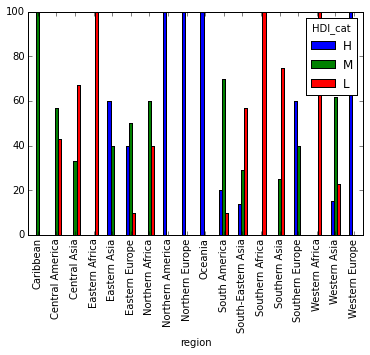

In [22]:
show_cols = ['H','M','L']
regions[show_cols].plot(kind='bar')

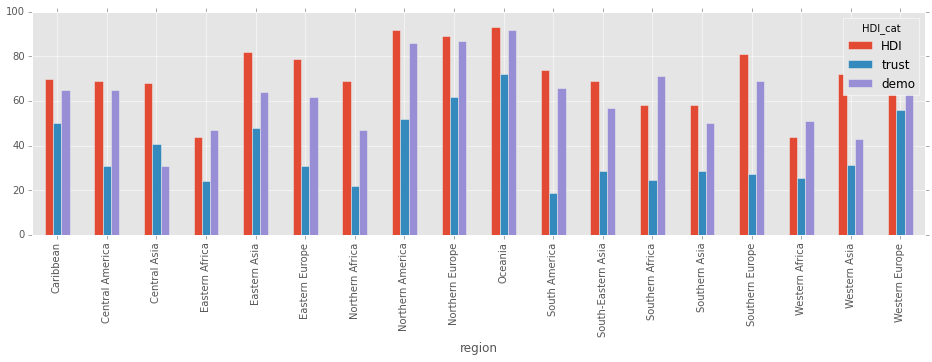

In [23]:
matplotlib.style.use('ggplot')    # <----------- NOTE 1: set the style of the figure

show_cols = ['HDI','trust','demo']
regcopy = regions[show_cols].copy()
regcopy['HDI'  ] = regcopy['HDI'  ]*100
regcopy['trust'] = regcopy['trust']/(1.5)
regcopy['demo' ] = regcopy['demo' ]*10
regcopy.plot(kind='bar',figsize=(16, 4)) # <----------- NOTE 2: set the figure size


# references

- [pandas cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html)
- [beter pd cookbook](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)
- [plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

.

# Appendix 1 - listing of used data

In [24]:
set_option('display.max_rows', len(dat))
dat

,region,country,HDI,trust,demo,HDI_cat,count
1,Southern Europe,Albania,0.749,51.2,5.67,M,1
2,Northern Africa,Algeria,0.713,38.6,3.83,M,1
4,South America,Argentina,0.811,40.4,6.84,H,1
5,Western Asia,Armenia,0.729,21.2,4.09,M,1
6,Oceania,Australia,0.938,103.6,9.22,H,1
7,Western Europe,Austria,0.895,70.2,8.62,H,1
8,Western Asia,Azerbaijan,0.734,32.8,3.15,M,1
9,Southern Asia,Bangladesh,0.515,47.7,5.86,L,1
10,Eastern Europe,Belarus,0.793,72.7,3.04,M,1
11,Western Europe,Belgium,0.897,63.0,8.05,H,1
